In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.load('../conn_weight.npz')
r2r_conn = data['r2r_conn']
r2r_weights = data['r2r_weights']
spike_counts = data['spike_counts']

In [17]:
spike_counts.reshape(6000, 25, 100).shape

(6000, 25, 100)

In [8]:
r2r_weights = r2r_weights * r2r_conn
r2r_weights[r2r_weights == 0] = np.nan

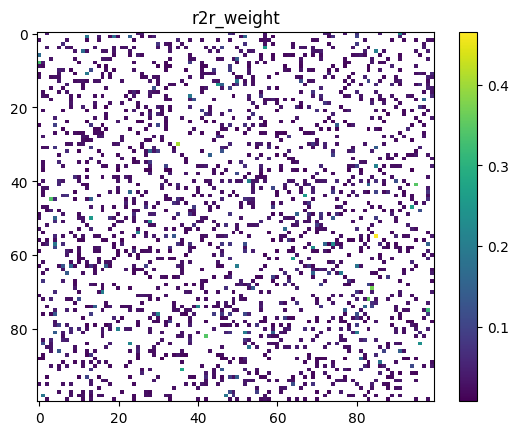

In [10]:
plt.imshow(r2r_weights.mean(axis=0), cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('r2r_weight')
plt.show()

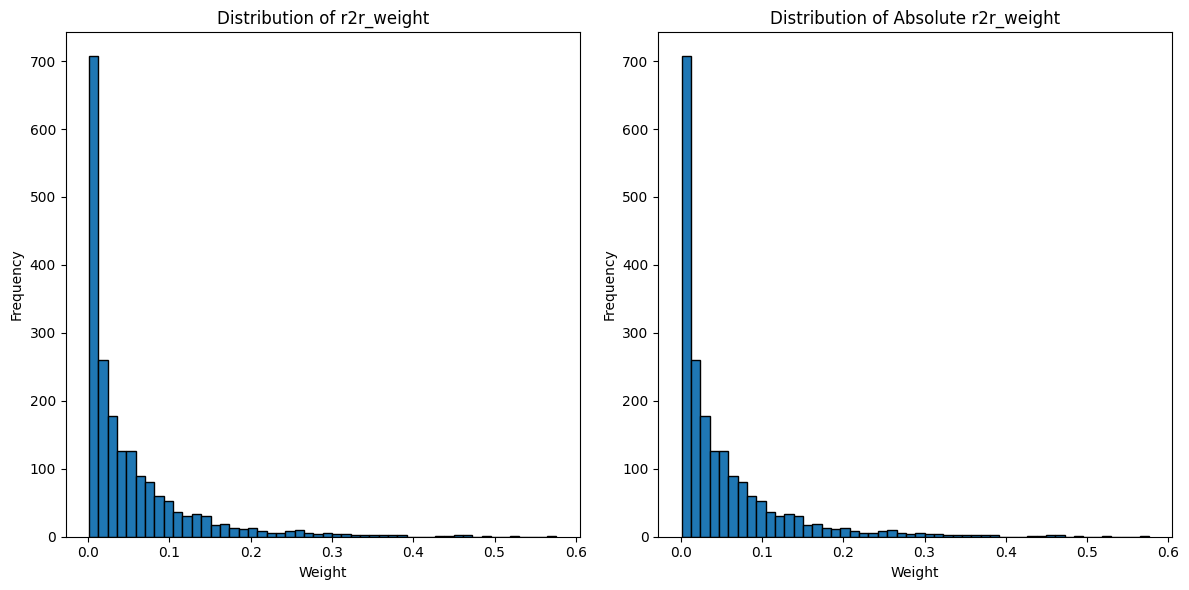

In [15]:
# 去除 NaN 值
r2r_weight_non_nan = r2r_weights[0][~np.isnan(r2r_weights[0])]

# 绘制原始数据的柱状图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2r_weight_non_nan, bins=50, edgecolor='black')
plt.title('Distribution of r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# 取绝对值后的数据
r2r_weight_abs = np.abs(r2r_weight_non_nan)

# 绘制绝对值后的柱状图
plt.subplot(1, 2, 2)
plt.hist(r2r_weight_abs, bins=50, edgecolor='black')
plt.title('Distribution of Absolute r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [31]:
last_r2r_weights = r2r_weights[-10:]

np.nansum(last_r2r_weights, axis=2).shape

(10, 100)

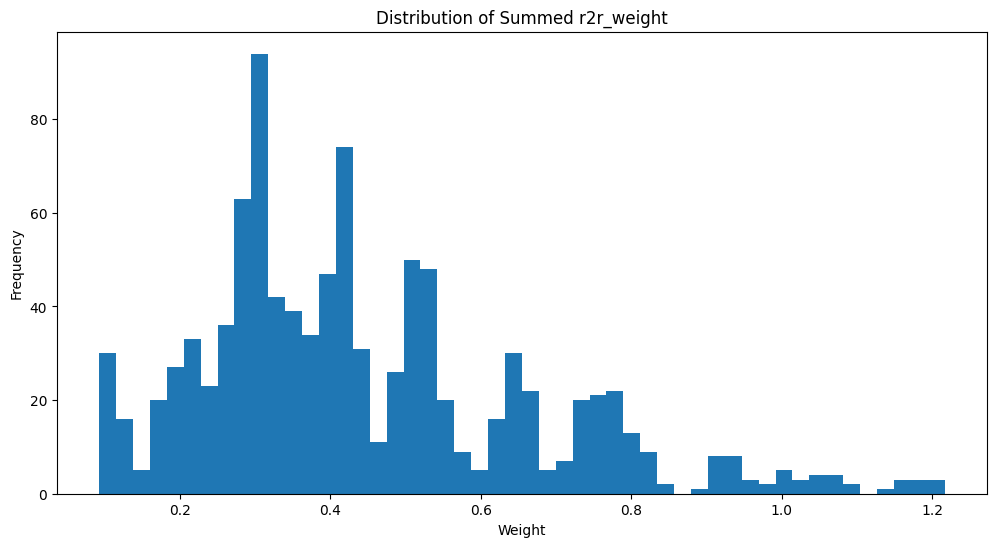

In [36]:
# 将 r2r_weight 竖着加起来
last_r2r_weights = r2r_weights[-10:]
r2r_weight_sum = np.nansum(last_r2r_weights, axis=2)

# 绘制竖着加起来后的柱状图，仅观察0到0.5的范围
plt.figure(figsize=(12, 6))
plt.hist(r2r_weight_sum.flatten(), bins=50)
plt.title('Distribution of Summed r2r_weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from scipy.stats import genextreme

# 拟合 GEV 分布
shape, loc, scale = genextreme.fit(np.abs(r2r_weight_non_nan))

# 打印拟合结果
print(f"Fit results: shape = {shape:.2f}, loc = {loc:.2f}, scale = {scale:.2f}")

Fit results: shape = -0.03, loc = 0.34, scale = 0.17


# Detect core-periphery structure in networks

In [11]:
import networkx as nx
import cpnet

# 创建一个有向图
G = nx.DiGraph()

# 获取节点数
num_nodes = r2r_conn.shape[0]

# 添加节点
G.add_nodes_from(range(num_nodes))

# 添加边和权重
for i in range(num_nodes):
    for j in range(num_nodes):
        if r2r_conn[i, j]:
            G.add_edge(i, j, weight=np.abs(r2r_weight[i, j]))

alg = cpnet.Rossa() # Load the Borgatti-Everett algorithm
alg.detect(G) # Feed the network as an input

x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [10]:
alg.get_coreness()

{0: np.float64(0.8993673529475927),
 1: np.float64(1.0351812401786447),
 2: np.float64(0.7395736635662615),
 3: np.float64(0.9538523918017745),
 4: np.float64(3.4460473230582287),
 5: np.float64(-0.20896657928824425),
 6: np.float64(0.7598474393598735),
 7: np.float64(1.0584743982180953),
 8: np.float64(-2.6014721704414114),
 9: np.float64(0.9236816680058837),
 10: np.float64(-4.672517569619231),
 11: np.float64(0.3378424160182476),
 12: np.float64(0.13276454247534275),
 13: np.float64(1.9462302569299936),
 14: np.float64(0.27551455283537507),
 15: np.float64(-0.10440444480627775),
 16: np.float64(0.6448205299675465),
 17: np.float64(-0.12986318860203028),
 18: np.float64(-0.23027869872748852),
 19: np.float64(1.4218614372171485),
 20: np.float64(-18.870950145996176),
 21: np.float64(1.1319414246827364),
 22: np.float64(-7.5608052731258795),
 23: np.float64(-0.1694859229028225),
 24: np.float64(-0.7100502327084541),
 25: np.float64(0.3092557489871979),
 26: np.float64(0.715847491286695

/Users/sichaohe/miniconda3/envs/rotation-2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


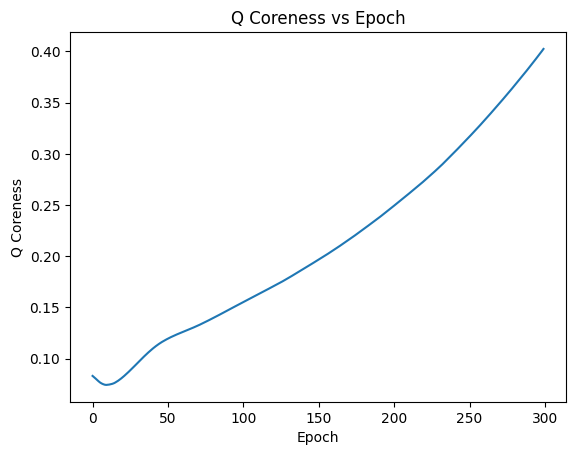

In [3]:
import sys
sys.path.append('../')
from utils import plot_q_coreness

plot_q_coreness(r2r_weights, r2r_conn)